In [16]:
import numpy as np
import matplotlib.pyplot as plt

Hyper parameter

In [17]:
max_iteration = 10000
weight_decay = 0.01
NUM_EMPLOYEES = 500
Upsilon_1 = 0.01
Upsilon_2 = 0.01
NUM_FEATURES = 10
BANDWIDTH = 100

Define the Training Set, the Life-Time Matrix and Gaussian Kernel.

In [18]:
X = np.random.normal(loc=0.0, scale=10.0, size=(NUM_EMPLOYEES, NUM_FEATURES)) # the training set

survival_times = np.zeros(NUM_EMPLOYEES) # the surivial time of each employees
for i in range(NUM_EMPLOYEES):
    age = np.random.exponential(np.sum(Upsilon_1 * X[i,:]**2)+np.sum(Upsilon_2 * X[i,:]), size=1)
    survival_times[i] = np.ceil(age)


Y = np.ones((NUM_EMPLOYEES, int(max(survival_times)))) # the lifetime matrix of all employees
for i in range(NUM_EMPLOYEES):
    Y[i, int(survival_times[i])-1:] = -1

square = np.sum(X ** 2, axis=1)
column_vec = square[:, np.newaxis]
row_vec = square[np.newaxis, :]
Gaussian_Kernel = np.exp(-1 * (-2 * X.dot(X.T) + column_vec + row_vec) / (2 * BANDWIDTH ** 2)) # the Gaussian Kernel 

In [19]:
print(Y.shape)
# print(Gaussian_Kernel[0,:])
maximum_ob_time = Y.shape[1]
# print(maximum_ob_time)

(500, 99)


The Stochastic sub-Gradient Descent is shown below

(500, 90, 90)
the iteration is: 0
the accuracy is: 0.9110666666666667
the c-index is, 0.0
the iteration is: 2000
the accuracy is: 0.5325333333333333
the c-index is, 0.2992945891783567
the iteration is: 4000
the accuracy is: 0.5984222222222222
the c-index is, 0.33972745490981965
the iteration is: 6000
the accuracy is: 0.5112444444444444
the c-index is, 0.09812424849699398
the iteration is: 8000
the accuracy is: 0.5159555555555555
the c-index is, 0.030292585170340683
the iteration is: 10000
the accuracy is: 0.5516
the c-index is, 0.2542364729458918
the iteration is: 12000
the accuracy is: 0.5509555555555555
the c-index is, 0.28312625250501
the iteration is: 14000
the accuracy is: 0.5709555555555555
the c-index is, 0.22004008016032064
the iteration is: 16000
the accuracy is: 0.6886222222222222
the c-index is, 0.3473426853707415
the iteration is: 18000
the accuracy is: 0.5685777777777777
the c-index is, 0.3119759519038076
[42. 42. 41. 42. 41. 42. 41. 42. 42. 42. 42. 42. 42. 41. 42. 42. 41.

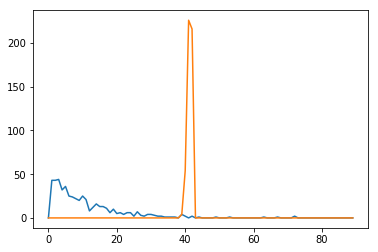

In [15]:
alpha = np.zeros_like(Y)
beta = np.zeros((NUM_EMPLOYEES,maximum_ob_time,maximum_ob_time))

print(beta.shape)
max_iteration = 20000
for t in range(max_iteration):
    index = int(np.floor(np.random.rand()*NUM_EMPLOYEES))
    haty_index = 0
    haty_index += (Gaussian_Kernel[index,:][np.newaxis,:].dot(alpha * Y)).reshape(-1)
    for i in range(NUM_EMPLOYEES):
        haty_index += np.sum(Gaussian_Kernel[index,i] * beta[i,:,:], axis =1)
    
    haty_index /= (t+1) * weight_decay

    ## update alpha

    mask = Y[index,:]*haty_index < 1
    alpha[index,] += mask

    ##update beta 
    s = 0
    e = np.argwhere(haty_index == np.max(haty_index))[-1][-1]
    while (True):
        for j in np.arange(e-1-s)+s:
            beta[index,j,e] += 1
        if e == maximum_ob_time - 1:
            break
        else:
            s = e + 1
            e +=  np.argwhere(haty_index[s:] == np.max(haty_index[s:]))[-1][-1]+1

                
    for j in range(maximum_ob_time):
        beta[index,j,j] = (-1) * np.sum(beta[index,j,j+1:])
    beta *= -1
    if t%2000 == 0:
        print("the iteration is:", t)
        #print(index)
        # print(np.sum(haty_index * Y[index]>1)/maximum_ob_time)
        hatY = np.zeros_like(Y)
        hatY += Gaussian_Kernel.T.dot(alpha*Y)
        for i in range(NUM_EMPLOYEES):
            hatY+= (Gaussian_Kernel[i,:][:,np.newaxis]+np.zeros((NUM_EMPLOYEES,maximum_ob_time))).dot(beta[i,:,:])
        hatY /= (t+1) * weight_decay
        predict_age = np.zeros(NUM_EMPLOYEES)
        for i in range(NUM_EMPLOYEES):
            predict_age[i] = np.sum(hatY[i,:] > 0)+1
        acc = np.sum(Y*hatY>0)/(NUM_EMPLOYEES *maximum_ob_time)
        print("the accuracy is:", acc)
        useful_pair = 0
        denominator = NUM_EMPLOYEES*(NUM_EMPLOYEES-1)/2
        for i in range(NUM_EMPLOYEES):
            for j in np.arange(NUM_EMPLOYEES-(i+1))+(i+1):
                # print(i,j)
                # print(survival_times[i],survival_times[j],predict_age[i],predict_age[j])
                if (survival_times[i]-survival_times[j])*(predict_age[i]-predict_age[j])> 0:
                    useful_pair += 1
                if  survival_times[i]-survival_times[j] == 0:
                    denominator -= 1
        
        c_index = useful_pair/ denominator
        
        c_index = useful_pair/(NUM_EMPLOYEES*(NUM_EMPLOYEES-1)/2)
        print("the c-index is,",c_index)
        
print(predict_age)
print(survival_times)

x_axis = np.arange(maximum_ob_time)
y_axis = np.zeros(maximum_ob_time)
y_predict_axis = np.zeros(maximum_ob_time)

for i in range(maximum_ob_time):
    y_axis[i] = np.sum(survival_times == x_axis[i])
    y_predict_axis[i] = np.sum(predict_age == x_axis[i])
plt.plot(x_axis, y_axis, y_predict_axis)

In [7]:
print(alpha)
print(beta)


[[16. 16. 16. ...  0.  0.  0.]
 [ 0.  6. 10. ...  0.  0.  0.]
 [19. 19. 19. ...  0.  0.  0.]
 ...
 [ 1.  2.  2. ...  0.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [11. 12. 12. ...  0.  0.  0.]]
[[[-0.  0. -0. ...  0.  0.  0.]
  [ 0. -0.  0. ...  0.  0.  0.]
  [ 0.  0. -0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  2.  0. -2.]
  [ 0.  0.  0. ...  0. -0.  0.]
  [ 0.  0.  0. ...  0.  0. -0.]]

 [[-2.  0.  1. ...  0.  0.  0.]
  [ 0.  3.  0. ...  0.  0.  0.]
  [ 0.  0.  2. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -3.  0.  3.]
  [ 0.  0.  0. ...  0. -0.  0.]
  [ 0.  0.  0. ...  0.  0. -0.]]

 [[-1.  0. -1. ...  0.  0.  0.]
  [ 0. -1.  0. ...  0.  0.  0.]
  [ 0.  0. -0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... -3.  0.  3.]
  [ 0.  0.  0. ...  0. -0.  0.]
  [ 0.  0.  0. ...  0.  0. -0.]]

 ...

 [[ 4.  0. -2. ...  0.  0.  0.]
  [ 0.  5.  0. ...  0.  0.  0.]
  [ 0.  0. -0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  3.  0. -3.]
  [ 0.  0.  0. ...  0. -0.  0.]
  [ 0.  0.  0. ...  0.  0. -0.]]

 [